In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [7]:
df.drop(["User ID", "Gender"], axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [9]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Text(0.5, 0, 'EstimatedSalary')

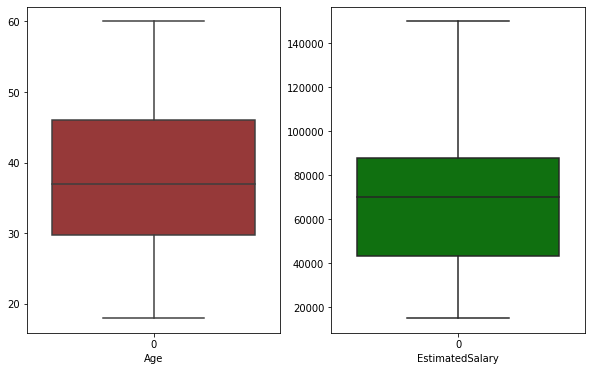

In [10]:
x = df.drop("Purchased", axis = 1)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(data=x['Age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Age')

sns.boxplot(data=x['EstimatedSalary'], ax=ax[1], color='g')
ax[1].set_xlabel('EstimatedSalary')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'EstimatedSalary')

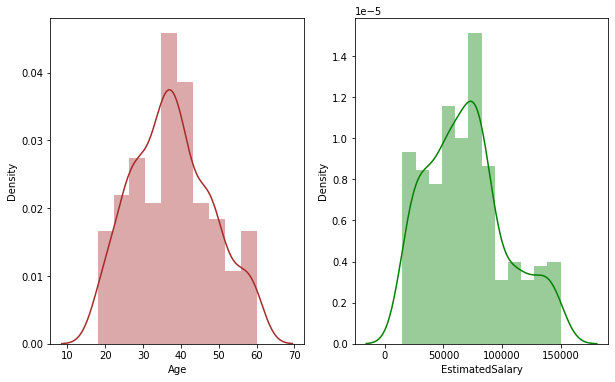

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.distplot(x['Age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Age')

sns.distplot(x['EstimatedSalary'], ax=ax[1], color='g')
ax[1].set_xlabel('EstimatedSalary')

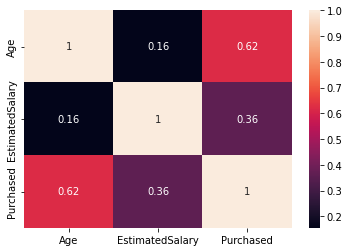

In [12]:
sns.heatmap(df.corr(), annot = True)

**Splitting the dataset into the Training set and Test set**

In [13]:
y = df["Purchased"]
#Split the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

**Fitting K-NN to the Training set**

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Predicting the Test set results**

In [18]:
y_pred = knn.predict(x_test)

**Making the Confusion Matrix**

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9

In [20]:
confusion_matrix(y_test,y_pred)


array([[47,  5],
       [ 3, 25]])